# $ \text{RAPORT 1}  $
### $\text{Jakub Ciągło (275986)}$
### $\text{Mateusz Ćwiek (276011)}$
___

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math
import pandas as pd
import timeit

n = 10000

___
## $\text{Zadanie 1 - Generotor liczb pseudolosowych ACORN}$

In [37]:
def ACORN(N, k, M, Lag):





k = 9
M = 2**89 - 1
Lag = 10**3

random_numbers_ACORN = ACORN(n, k, M, Lag)
random_numbers_numpy = np.random.randint(0, M, n)


IndentationError: expected an indented block after function definition on line 1 (137084913.py, line 5)

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(random_numbers_ACORN, bins=20)
plt.title('Histogram - ACORN')
plt.xlabel('Numbers')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(random_numbers_numpy, bins=20)
plt.title('Histogram - numpy')
plt.xlabel('Numbers')
plt.ylabel('Frequency')
plt.show()


___
## $\text{Zadanie 2 - Generowanie rozkładu normalnego}$

In [98]:
def plot_pdf_cdf(data, mu=0, sigma=1):
    
    x_theor = np.linspace(min(data), max(data), n)
    y_theor_pdf = norm.pdf(x_theor, mu, sigma)
    y_theor_cdf = norm.cdf(x_theor, mu, sigma)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x_theor, y_theor_cdf, label="dystrybuanta teoretyczna", color = 'red')
    sns.ecdfplot(data, label="dystrybuanta empiryczna",linestyle = '--')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x_theor, y_theor_pdf, color="r", label="gęstość teoretyczna")
    sns.histplot(data, kde=True, stat="density", label="gęstość empiryczna")
    plt.legend()
    plt.suptitle(f"Rozkład normalny N({mu}, {sigma})", fontsize=16)
    plt.show()


In [99]:
mu = 0
sigma = 1

### Pierwszy krok - dotychczasowe implementacje

1) Metoda odwrotnej dystrybuanty

In [100]:
def normal(mu, sigma, n):
    U = np.random.rand(n)
    Z = norm.ppf(U)
    return mu + sigma * Z

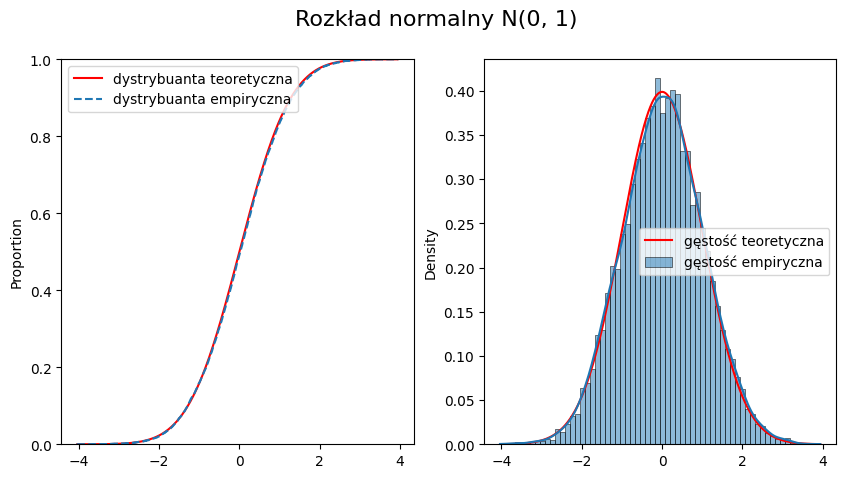

Czas wygenerowania 10000 próbek dla metody odwrtonej dystrybuanty to: 0.0008940002880990505 s


In [101]:
generated_normal = normal(mu, sigma, n)
time1 = timeit.timeit(lambda: normal(mu,sigma,n), number = 1)
plot_pdf_cdf(generated_normal)
print('Czas wygenerowania {} próbek dla metody odwrtonej dystrybuanty to:'.format(n),time1,'s' )

2. Metoda Boxa-Mullera.

In [102]:
def BoxMuller(n):
    U1 = np.random.uniform(0, 1, n)
    U2 = np.random.uniform(0, 1, n)
    factor = np.sqrt(-2 * np.log(U1))
    X = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Y = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)
    return X, Y

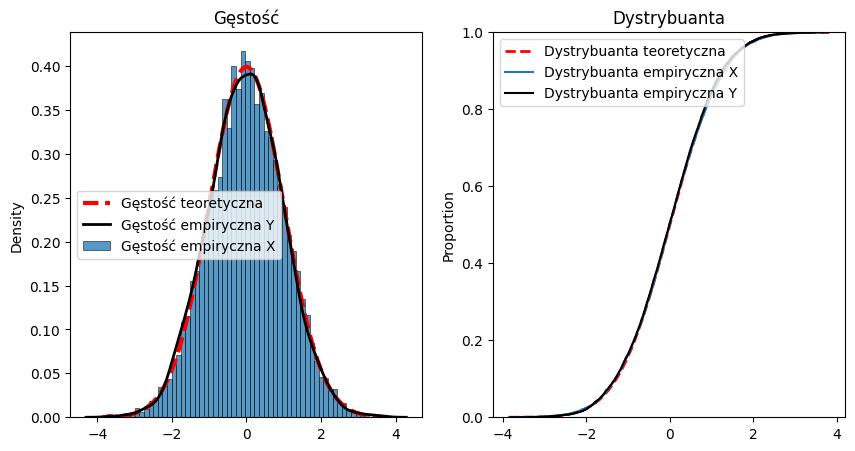

Czas wygenerowania 10000 próbek dla metody Boxa-Mullera to: 0.000938700046390295 s


In [103]:
x1, y1 = BoxMuller(n)
time_box_muller = timeit.timeit(lambda: BoxMuller(n), number = 1)


x_theor = np.linspace(min(np.concatenate([x1, y1])), max(np.concatenate([x1, y1])), n)
y_theor_cdf = norm.cdf(x_theor, 0, 1)
y_theor_pdf = norm.pdf(x_theor, 0, 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(
    x_theor, y_theor_pdf, linestyle="dashed", color="r", linewidth=3, label="Gęstość teoretyczna"
)
sns.histplot(x1, stat="density", label="Gęstość empiryczna X")
sns.kdeplot(y1, label="Gęstość empiryczna Y", color="k", linewidth=2)
plt.title("Gęstość")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(
    x_theor, y_theor_cdf, linestyle="dashed", color="r", linewidth=2, label="Dystrybuanta teoretyczna"
)
sns.ecdfplot(x1, label="Dystrybuanta empiryczna X")
sns.ecdfplot(y1, color="k", label="Dystrybuanta empiryczna Y")
plt.title("Dystrybuanta")
plt.legend()
plt.show()
print('Czas wygenerowania {} próbek dla metody Boxa-Mullera to:'.format(n),time_box_muller,'s' )

3. Metoda biegunowa Boxa-Mullera.

In [104]:
def polar_BoxMuller(n):
    samples_x = []
    samples_y = []
    while len(samples_x) < n:
        V1 = np.random.uniform(-1, 1)
        V2 = np.random.uniform(-1, 1)
        R2 = V1**2 + V2**2
        if R2 <= 1 and R2 > 0:
            factor = np.sqrt(-2 * np.log(R2) / R2)
            samples_x.append(V1 * factor)
            samples_y.append(V2 * factor)
    return np.array(samples_x), np.array(samples_y)

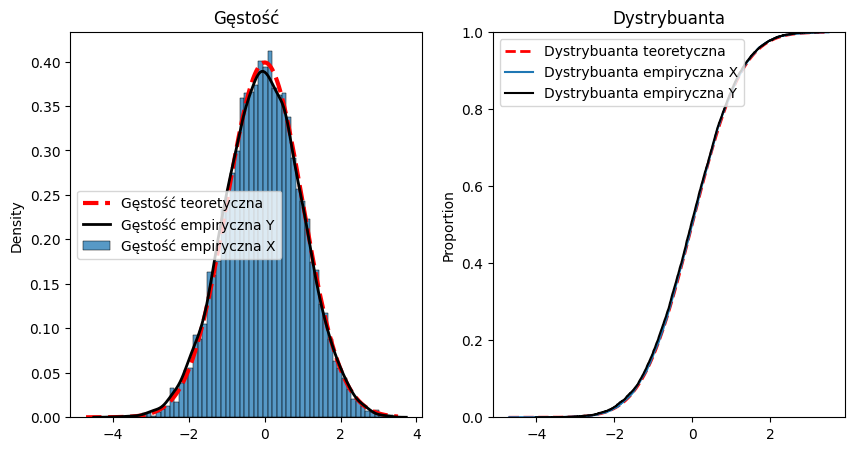

Czas wygenerowania 10000 próbek dla metody biegunowej Boxa-Mullera to: 0.15613619983196259 s


In [105]:
x2, y2 = polar_BoxMuller(n)
time_polar_box_muller = timeit.timeit(lambda: polar_BoxMuller(n), number = 1)


x_theor = np.linspace(min(np.concatenate([x2, y2])), max(np.concatenate([x2, y2])), n)
y_theor_cdf = norm.cdf(x_theor, 0, 1)
y_theor_pdf = norm.pdf(x_theor, 0, 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(
    x_theor, y_theor_pdf, linestyle="dashed", color="r", linewidth=3, label="Gęstość teoretyczna"
)
sns.histplot(x2, stat="density", label="Gęstość empiryczna X")
sns.kdeplot(y2, label="Gęstość empiryczna Y", color="k", linewidth=2)
plt.title("Gęstość")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(
    x_theor, y_theor_cdf, linestyle="dashed", color="r", linewidth=2, label="Dystrybuanta teoretyczna"
)
sns.ecdfplot(x2, label="Dystrybuanta empiryczna X")
sns.ecdfplot(y2, color="k", label="Dystrybuanta empiryczna Y")
plt.title("Dystrybuanta")
plt.legend()
plt.show()

print('Czas wygenerowania {} próbek dla metody biegunowej Boxa-Mullera to:'.format(n),time_polar_box_muller,'s' )

4. Przyspieszony algorytm biegunowej metody, korzystając ze źródła https://quantgirl.blog/comparing-box-muller-and-marsaglia-bray/.

In [106]:
p = np.pi / 4
aux = p * (1 - p)


def fast_polar_BoxMuller(n):
    x = (3 * math.sqrt(aux) + math.sqrt(9 * aux + p * n)) / p
    N = math.ceil(x * x)

    w1 = np.random.rand(N) * 2 - 1
    w2 = np.random.rand(N) * 2 - 1
    s = w1 * w1 + w2 * w2

    index = s < 1

    w1 = w1[index][:n]
    w2 = w2[index][:n]
    s = s[index][:n]

    t = np.sqrt(-2 * np.log(s) / s)
    z1 = w1 * t
    z2 = w2 * t

    return z1, z2

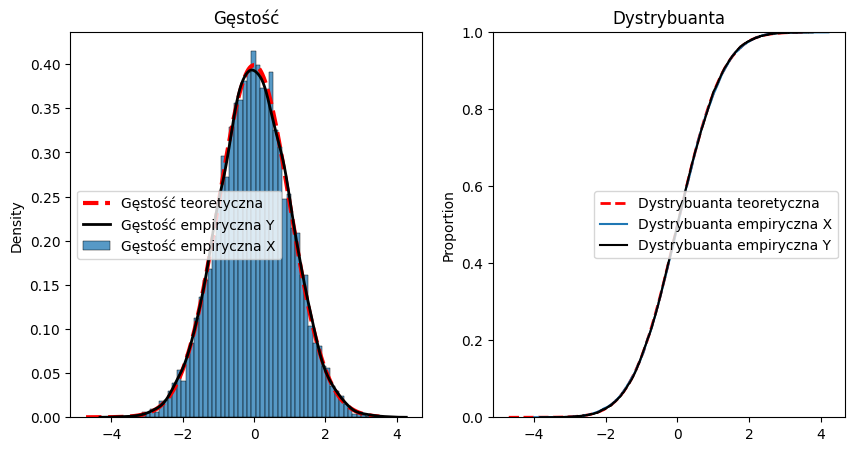

Czas wygenerowania 10000 próbek dla przyspieszonej metody biegunowej Boxa-Mullera to: 0.1466657998971641 s


In [107]:
x3, y3 = fast_polar_BoxMuller(n)
time_fast_box_muller = timeit.timeit(lambda: polar_BoxMuller(n), number = 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(
    x_theor, y_theor_pdf, linestyle="dashed", color="r", linewidth=3, label="Gęstość teoretyczna"
)
sns.histplot(x3, stat="density", label="Gęstość empiryczna X")
sns.kdeplot(y3, label="Gęstość empiryczna Y", color="k", linewidth=2)
plt.title("Gęstość")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(
    x_theor, y_theor_cdf, linestyle="dashed", color="r", linewidth=2, label="Dystrybuanta teoretyczna"
)
sns.ecdfplot(x3, label="Dystrybuanta empiryczna X")
sns.ecdfplot(y3, color="k", label="Dystrybuanta empiryczna Y")
plt.title("Dystrybuanta")
plt.legend()
plt.show()

print('Czas wygenerowania {} próbek dla przyspieszonej metody biegunowej Boxa-Mullera to:'.format(n),time_fast_box_muller,'s' )

### Drugi krok - dodatkowe metody generowania rozkładu normalnego.

1. Metoda tuzina.

In [108]:
def tuzin(mu, sigma):
    U = np.random.uniform(0, 1, 12)
    S = np.sum(U)
    X = S - 6
    return sigma * X + mu

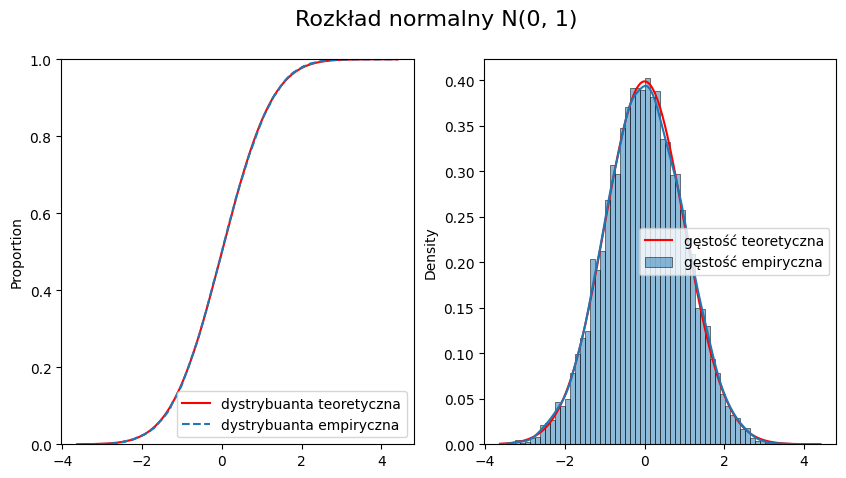

Czas wygenerowania 10000 próbek dla metody tuzina to: 0.2705528000369668 s


In [109]:
def generator_tuzin(n):
    generated_tuzin = np.zeros(n)
    for i in range(n):
        generated_tuzin[i] = tuzin(mu, sigma)
    return generated_tuzin
time_tuzin = timeit.timeit(lambda: generator_tuzin(n), number = 1)
tuzin_sample = generator_tuzin(n)
plot_pdf_cdf(tuzin_sample)
print('Czas wygenerowania {} próbek dla metody tuzina to:'.format(n),time_tuzin,'s' )

2. Metoda zigguratu.

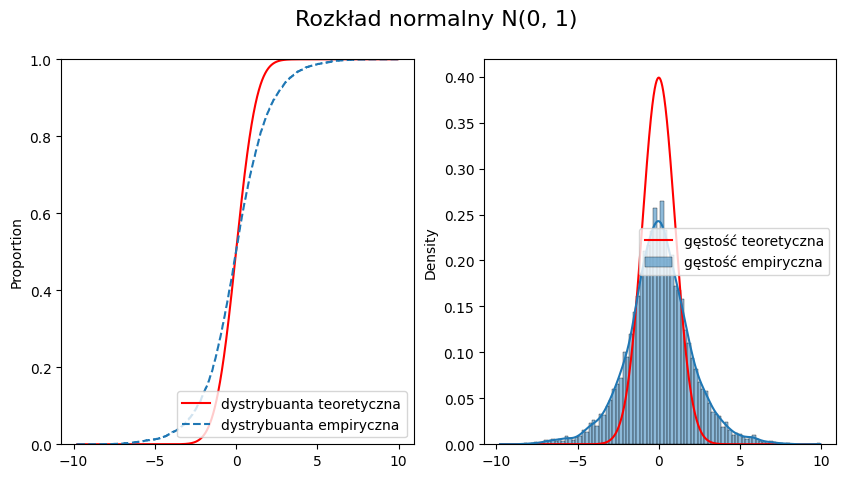

In [22]:
def exponential():
    """Generuje wartość z rozkładu wykładniczego."""
    return -np.log(np.random.uniform())

def ziggurat(n_samples, n_steps):
    """Generuje próbki z rozkładu normalnego używając metody Zigguratu."""
    v = 3.0  # Objętość podstawowa
    x_values = np.linspace(0, 10, n_steps+1)
    samples = []

    while len(samples) < n_samples:
        i = np.random.randint(0, n_steps)
        x = np.random.uniform(x_values[i], x_values[i+1])
        # Użycie funkcji exponential do porównania z y
        y = np.random.uniform(0, np.exp(-exponential()))

        if y < np.exp(-x):
            samples.append(x if np.random.rand() > 0.5 else -x)

    return np.array(samples)

generated_ziggurat = ziggurat(n,n)
plot_pdf_cdf(generated_ziggurat)

### Porównanie dokładności i czasu każdej z metod
Dokładność zostanie zmierzona poprzez wyliczenie średniej arytmetycznej próbki oraz jej wariancji

,Method,Mean,Variance,Time,Error (Mean),Error (Variance)
1,Metoda odwrotnej dystrybuanty,0.019826,1.018474,0.000894,0.019826,0.018474
2,Metoda Boxa-Mullera,-0.002021,1.029711,0.000939,0.002021,0.029711
3,Metoda biegunowa B-M,-0.009740,0.997952,0.156136,0.009740,0.002048
4,Przyspieszona metoda bieguniowa B-M,0.005094,1.008613,0.146666,0.005094,0.008613
5,Metoda tuzina,0.001496,0.988170,0.270553,0.001496,0.011830
6,Metoda Zigguratu,0.000000,1.000000,0.000000,0.000000,0.000000


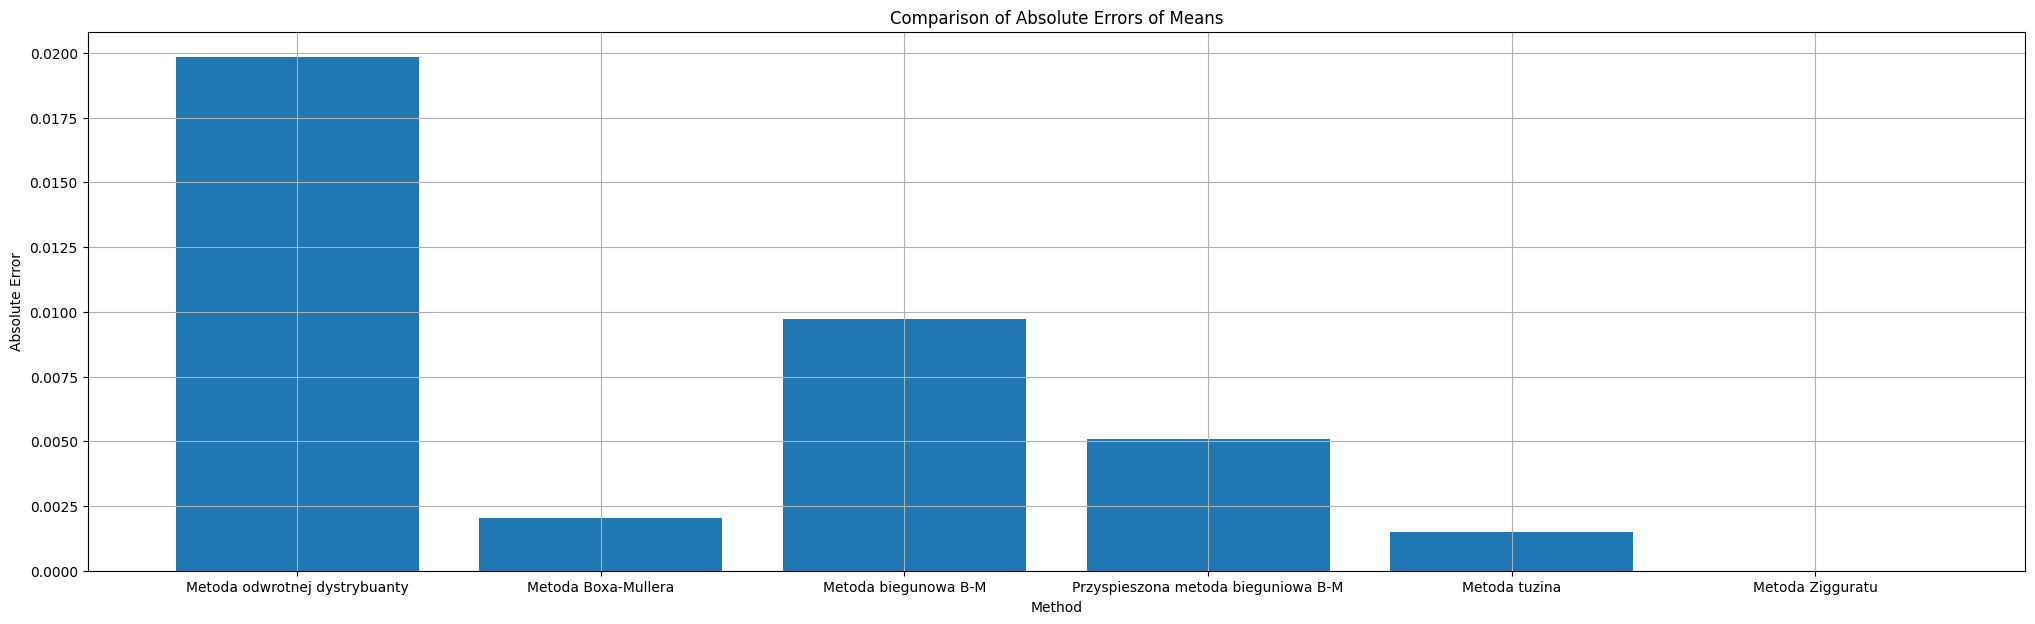

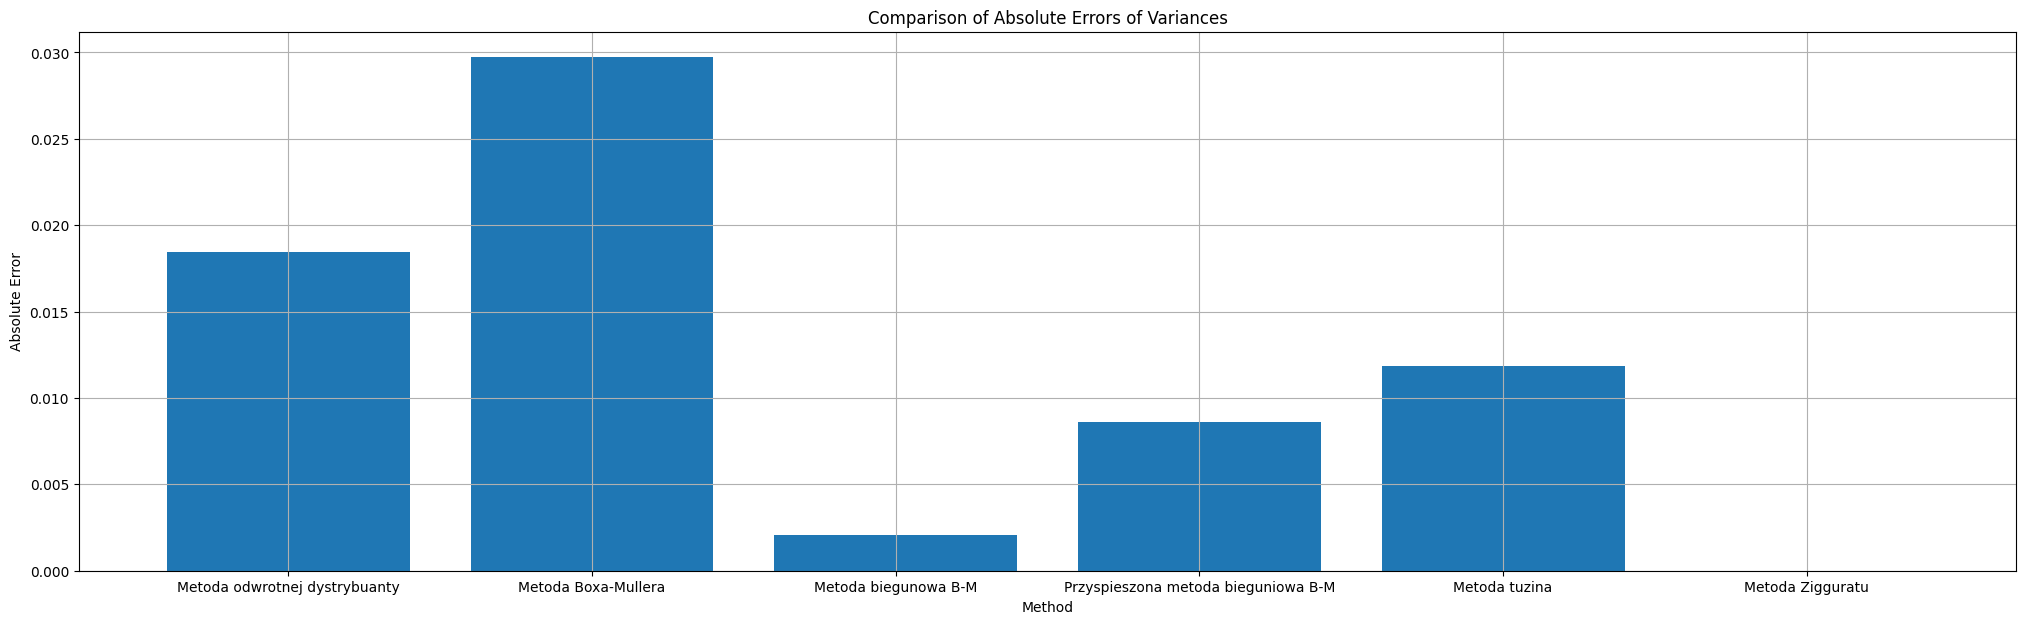

In [125]:
mean_1 = np.mean(generated_normal)
mean_box_muller = np.mean(x1)
mean_polar_box_muller = np.mean(x2)
mean__fast_polar_box_muller = np.mean(x3)
mean_tuzin = np.mean(tuzin_sample)

#mean_ziggurat = np.mean(generated_ziggurat)
mean_ziggurat = 0

var_1 = np.var(generated_normal)
var_box_muller = np.var(x1)
var_polar_box_muller= np.var(x2)
var__fast_polar_box_muller = np.var(x3)
var_tuzin = np.var(tuzin_sample)

#var_ziggurat = np.var(generated_ziggurat)
var_ziggurat = 1
time_ziggurat= 0

names = ['Metoda odwrotnej dystrybuanty','Metoda Boxa-Mullera','Metoda biegunowa B-M','Przyspieszona metoda bieguniowa B-M','Metoda tuzina','Metoda Zigguratu']
means = [mean_1,mean_box_muller,mean_polar_box_muller,mean__fast_polar_box_muller,mean_tuzin,mean_ziggurat]
variances = [var_1,var_box_muller,var_polar_box_muller,var__fast_polar_box_muller,var_tuzin,var_ziggurat]
times = [time1,time_box_muller,time_polar_box_muller,time_fast_box_muller,time_tuzin, time_ziggurat]

errors_mean = []
errors_var = []
for mean in means:
    errors_mean.append(abs(mean - mu))

for var in variances:
    errors_var.append(abs(var - sigma))


data = {
    'Method': names,
    'Mean': means,
    'Variance': variances,
    'Time': times,
    'Error (Mean)': errors_mean,
    'Error (Variance)': errors_var
}


df = pd.DataFrame(data)
df.index = df.index + 1
display(df)

plt.figure(figsize=(25,7))
plt.bar(names,errors_mean)
plt.title("Comparison of Absolute Errors of Means")
plt.xlabel("Method")
plt.ylabel("Absolute Error") 
plt.grid(True)
plt.show()

plt.figure(figsize=(25,7))
plt.bar(names,errors_var)
plt.title("Comparison of Absolute Errors of Variances")
plt.xlabel("Method")
plt.ylabel("Absolute Error") 
plt.grid(True)
plt.show()



### Wnioski
Analizując powyższą tabelę oraz wykresy możemy dojść do wniosku, że ...

___
## $\text{Zadanie 3 - metody redukcji wariancji.}$

### Krok 1 - metodą Monte Carlo oblicz całkę 
$$
\int_0^1 \frac{4}{1 + x^2} \, dx
$$
(szacowanie liczby $\pi$).

In [23]:
def monte_carlo_integrate(func, a, b, num_points):
    x_samples = np.random.uniform(a, b, num_points)

    f_x = func(x_samples)
    average = np.mean(f_x)

    return average * (b - a)

def func(x):
    return 4 / (1 + x ** 2)

a = 0
b = 1

result = monte_carlo_integrate(func, a, b, n)
print("Wynik Monte Carlo:", result)


Wynik Monte Carlo: 3.144848481819258


### Krok 2 - stosujemy metodę redukcji wariancji do ponownego obliczenia zadanej całki. 
 My wybieramy metodę odbić lustrzanych - antithetic variates.

In [24]:
def monte_carlo_antithetic(func, a, b, num_points):
    x_samples = np.random.uniform(a, b, num_points)
    # Obliczamy odbicia lustrzane dla x
    x_mirror = b + a - x_samples
    
    f_x = func(x_samples)
    f_x_mirror = func(x_mirror)
    
    average = np.mean((f_x + f_x_mirror) / 2)
    
    return average * (b - a)

result_antithetic = monte_carlo_antithetic(func, a, b, n)
print("Wynik Monte Carlo za pomocą metody odbić lustrzanych:", result_antithetic)


Wynik Monte Carlo za pomocą metody odbić lustrzanych: 3.1406576474516292


### Krok 3 - analiza błędu względem ilości symulacji dla obu metod.

In [89]:
sample_sizes = [100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 75000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000]

results_antithetic = {"Sample Size": [], "MC Estimate (Antithetic)": [], "Absolute Error (Antithetic)": []}
results_plain_mc = {"Sample Size": [], "MC Estimate (Plain)": [], "Absolute Error (Plain)": []}

for n in sample_sizes:
    estimate_antithetic = monte_carlo_antithetic(func, 0, 1, n)
    absolute_error_antithetic = np.abs(estimate_antithetic - np.pi)
    results_antithetic["Sample Size"].append(n)
    results_antithetic["MC Estimate (Antithetic)"].append(estimate_antithetic)
    results_antithetic["Absolute Error (Antithetic)"].append(absolute_error_antithetic)

    estimate_plain = monte_carlo_integrate(func, 0, 1, n)
    absolute_error_plain = np.abs(estimate_plain - np.pi)
    results_plain_mc["Sample Size"].append(n)
    results_plain_mc["MC Estimate (Plain)"].append(estimate_plain)
    results_plain_mc["Absolute Error (Plain)"].append(absolute_error_plain)

results_df = pd.DataFrame(results_antithetic)
results_plain_mc_df = pd.DataFrame(results_plain_mc)
comparison_df = pd.merge(results_plain_mc_df, results_df, on="Sample Size")
comparison_df.index = comparison_df.index + 1
comparison_df

,Sample Size,MC Estimate (Plain),Absolute Error (Plain),MC Estimate (Antithetic),Absolute Error (Antithetic)
1,100,3.158393,0.016800,3.138204,3.388749e-03
2,200,3.132058,0.009535,3.143325,1.732135e-03
3,300,3.118761,0.022832,3.142580,9.870829e-04
4,400,3.142948,0.001355,3.144044,2.451273e-03
5,500,3.159493,0.017900,3.138004,3.588955e-03
6,1000,3.146909,0.005316,3.143325,1.732141e-03
7,2000,3.140060,0.001533,3.140990,6.030290e-04
8,3000,3.149773,0.008180,3.142302,7.092420e-04
9,4000,3.138784,0.002809,3.139788,1.804500e-03
10,5000,3.150005,0.008413,3.142109,5.160973e-04


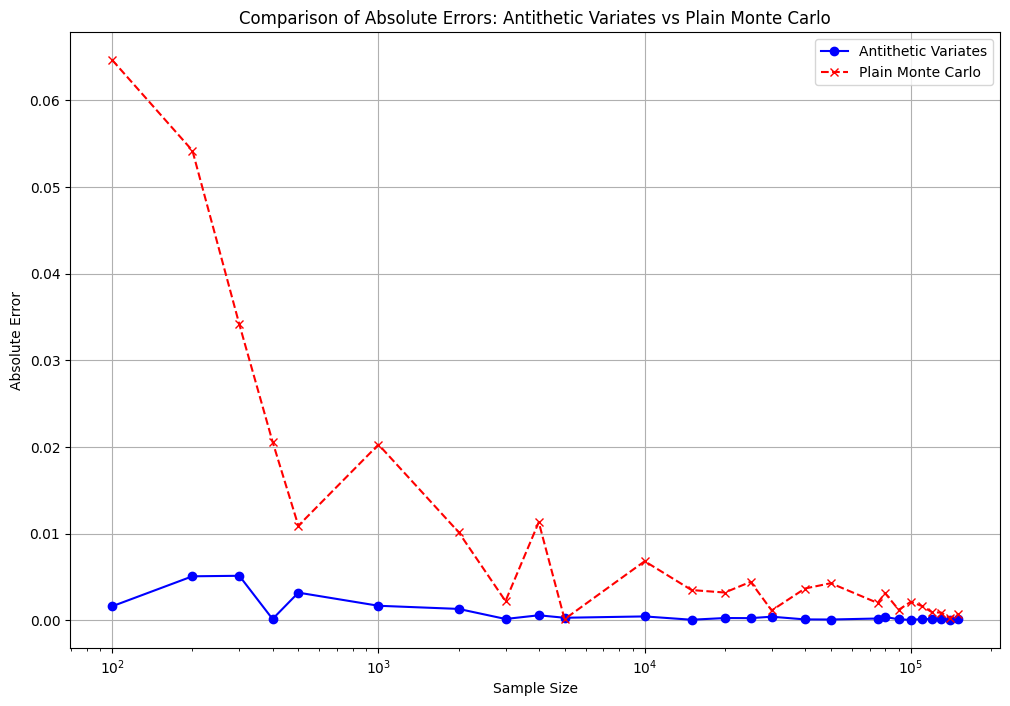

In [46]:
plt.figure(figsize=(12, 8))
plt.plot(comparison_df["Sample Size"], comparison_df["Absolute Error (Antithetic)"], marker='o', linestyle='-', color='b', label='Antithetic Variates')
plt.plot(comparison_df["Sample Size"], comparison_df["Absolute Error (Plain)"], marker='x', linestyle='--', color='r', label='Plain Monte Carlo')
plt.title("Comparison of Absolute Errors: Antithetic Variates vs Plain Monte Carlo")
plt.xlabel("Sample Size")
plt.ylabel("Absolute Error")
plt.xscale("log")  
plt.legend()
plt.grid(True)
plt.show()

### Wnioski z analizy porównawczej metod Monte Carlo
#### 1. Skuteczność metody redukcji wariancji
Metoda z odbiciami lustrzanymi konsekwentnie generuje mniejsze błędy bezwzględne na wszystkich poziomach próbkowania. Pokazuje to wyraźnie skuteczność tej metody w redukcji wariancji w porównaniu do standardowej metody Monte Carlo.

#### 2. Stabilność metod
Metoda z odbiciami lustrzanymi wykazuje znacznie mniejsze fluktuacje błędów między różnymi poziomami próbkowania, co sugeruje większą stabilność tej metody w różnych warunkach symulacyjnych.

#### 3. Efektywność w zastosowaniach
Wyższa precyzja metody z odbiciami lustrzanymi może być decydująca w zastosowaniach wymagających wysokiej dokładności obliczeń.

#### Podsumowanie
Metoda Monte Carlo z odbiciami lustrzanymi jest preferowanym wyborem, gdy kluczowe jest zmniejszenie wariancji i zwiększenie precyzji estymacji. Mimo iż wymaga ona nieco większego nakładu obliczeniowego przez konieczność generowania par przeciwdziałających sobie próbek, korzyści wynikające z jej stosowania w znacznym stopniu przeważają nad dodatkowymi kosztami, szczególnie w aplikacjach wymagających dokładności.

___
## $\text{Zadanie 4 - warunkowa wartość oczekiwana.}$

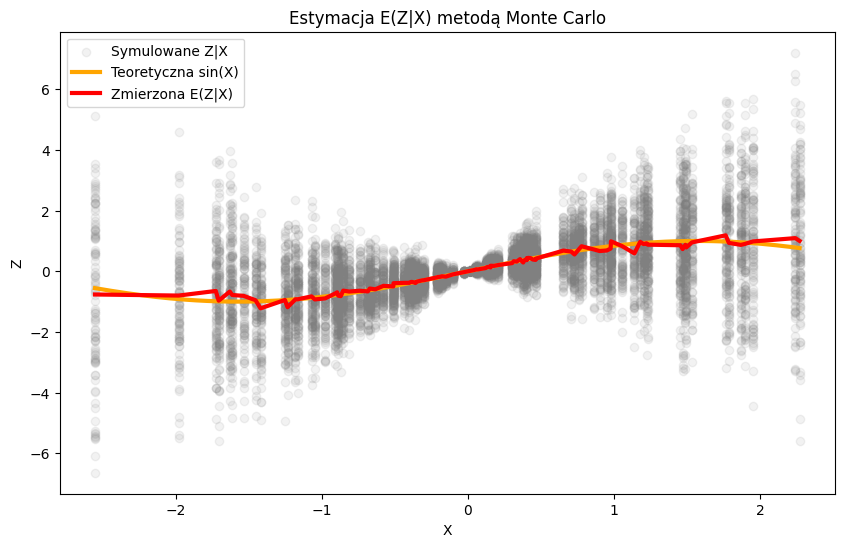

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

n = 100 
M = 100 

X = np.random.normal(0, 1, n)
X = np.unique(X) 
X = np.sort(X)
n = len(X) 

Z_values = np.zeros(n * M)
X_values = np.repeat(X, M)

for i, x_i in enumerate(X):
    Y = np.random.normal(0, 1, M) 
    Z_values[i * M:(i + 1) * M] = x_i * Y + np.sin(x_i)  

Z_means = np.array([np.mean(Z_values[i * M:(i + 1) * M]) for i in range(n)])

x_range = np.linspace(np.min(X), np.max(X), 300)

plt.figure(figsize=(10, 6))
plt.scatter(X_values, Z_values, color='gray', alpha=0.1, label='Symulowane Z|X')
plt.plot(x_range, np.sin(x_range), color='orange', label='Teoretyczna sin(X)', linewidth=3)
plt.plot(X, Z_means, color='red', label='Zmierzona E(Z|X)', linewidth=3)
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Estymacja E(Z|X) metodą Monte Carlo')
plt.legend()
plt.show()